In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
df=pd.read_csv('Salary_Prediction.csv')

In [5]:
df

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...,...
6699,6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


In [6]:
df.shape

(6704, 9)

In [7]:
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [8]:
df.tail()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
6699,6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean
6703,6703,26.0,Female,High School,Sales Executive,1.0,35000.0,Canada,Black


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6704 non-null   int64  
 1   Age                  6702 non-null   float64
 2   Gender               6702 non-null   object 
 3   Education Level      6701 non-null   object 
 4   Job Title            6702 non-null   object 
 5   Years of Experience  6701 non-null   float64
 6   Salary               6699 non-null   float64
 7   Country              6704 non-null   object 
 8   Race                 6704 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 471.5+ KB


In [10]:
df.describe()

,Unnamed: 0,Age,Years of Experience,Salary
count,6704.000000,6702.000000,6701.000000,6699.000000
mean,3351.500000,33.620859,8.094687,115326.964771
std,1935.422435,7.614633,6.059003,52786.183911
min,0.000000,21.000000,0.000000,350.000000
25%,1675.750000,28.000000,3.000000,70000.000000
50%,3351.500000,32.000000,7.000000,115000.000000
75%,5027.250000,38.000000,12.000000,160000.000000
max,6703.000000,62.000000,34.000000,250000.000000


In [11]:
df=df.drop(['Unnamed: 0'],axis=1)
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


In [12]:
df.shape

(6704, 8)

In [13]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

In [14]:
df.dropna(axis=0,inplace=True)

In [15]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


In [16]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

In [17]:
x=df['Gender'].value_counts()
x

Male      3671
Female    3013
Other       14
Name: Gender, dtype: int64

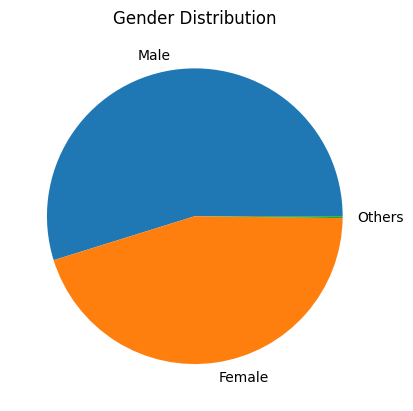

In [18]:
plt.pie(x,labels=['Male','Female','Others'])
plt.title('Gender Distribution')
plt.show()

In [19]:
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [20]:
def categorize_job_title(job_title):
    job_title=str(job_title).lower()
    if 'software' in job_title or 'developer' in job_title:
        return 'Software/Developer'
    elif 'data' in job_title or 'analyst' in job_title or 'scientist' in job_title:
        return 'Data Analyst/Scientist'
    elif 'manager' in job_title or 'director' in job_title or 'vp' in job_title:
        return 'Manager/Director/VP'
    elif 'sales' in job_title or 'representative' in job_title:
        return 'Data Analyst/Scientist'
    elif 'data' in job_title or 'analyst' in job_title or 'scientist' in job_title:
        return 'Sales'
    elif 'marketing' in job_title or 'social media' in job_title:
        return 'Marketing/Social Media'
    elif 'hr' in job_title or 'human resource' in job_title:
        return 'HR/ Human Resource'
    elif 'financial' in job_title or 'accountant' in job_title:
        return 'Financial/ Accountant'
    elif 'project manager' in job_title:
        return 'Project Manager'
    elif 'it' in job_title or 'support' in job_title:
        return 'IT/ Technical Support'
    elif 'operations' in job_title or 'supply chain' in job_title:
        return 'Operations/Supply Chain'
    elif 'customer service' in job_title or 'receptionist' in job_title:
        return 'Customer Service/Receptionist'
    else:
        return 'Others'
    
df['Job Title'] = df['Job Title'].apply(categorize_job_title)    

In [21]:
df['Job Title'].unique()

array(['Software/Developer', 'Data Analyst/Scientist',
       'Manager/Director/VP', 'Marketing/Social Media',
       'Customer Service/Receptionist', 'Others', 'IT/ Technical Support',
       'Financial/ Accountant', 'HR/ Human Resource',
       'Operations/Supply Chain'], dtype=object)

In [22]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [23]:
def categorize_education_level(education_level):
    education_level=str(education_level).lower()
    
    if 'bachelor\'s' in education_level:
        return 'Bachelors'
    elif 'master\'s' in education_level:
        return 'Masters'
    elif 'phd' in education_level:
        return 'PhD'
    elif 'high school' in education_level:
        return 'High School'
    
df['Education Level'] = df['Education Level'].apply(categorize_education_level)  

In [24]:
df['Education Level'].unique()

array(['Bachelors', 'Masters', 'PhD', 'High School'], dtype=object)

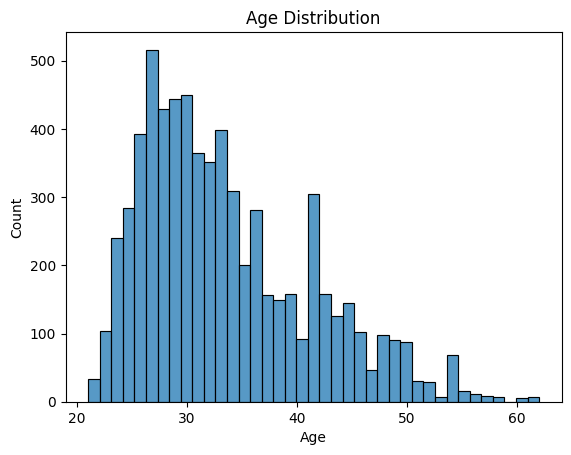

In [25]:
sns.histplot(data=df, x='Age')
plt.title('Age Distribution')
plt.show()

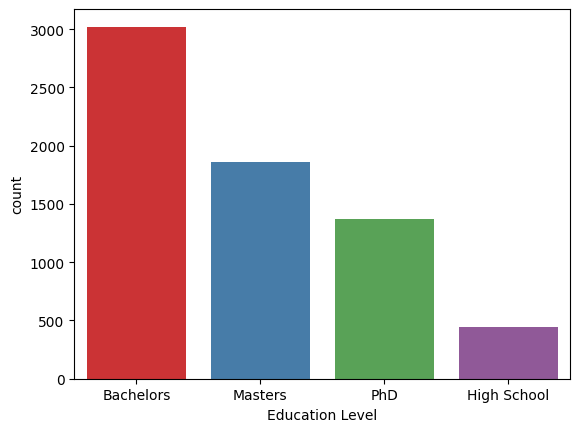

In [26]:
sns.countplot(x = 'Education Level', data = df, palette='Set1')
plt.xticks()
plt.show()

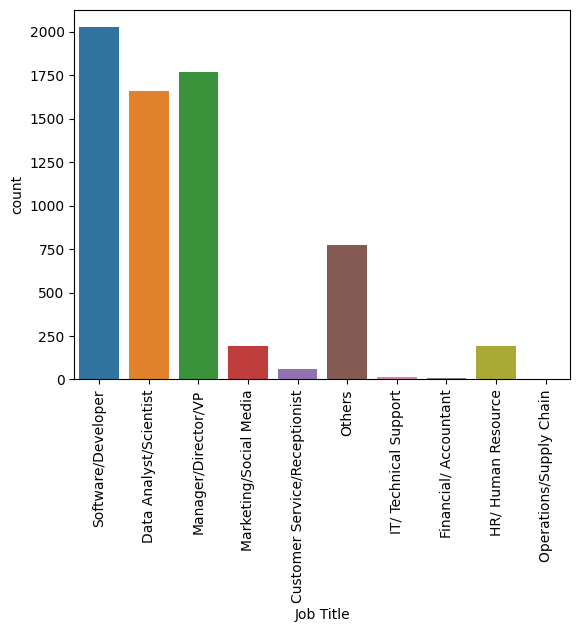

In [27]:
sns.countplot(x = 'Job Title', data = df)
plt.xticks(rotation=90)
plt.show()

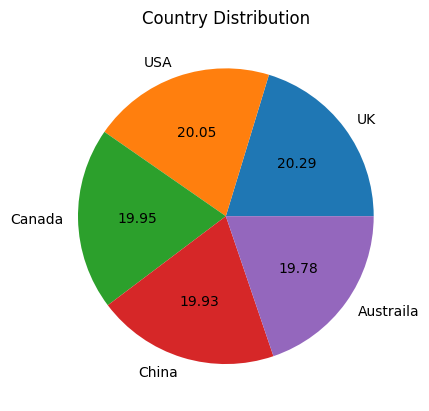

In [28]:
y=df['Country'].value_counts()
y
plt.pie(y,labels=['UK','USA','Canada','China','Austraila'], autopct= '%.2f')
plt.title('Country Distribution')
plt.show()

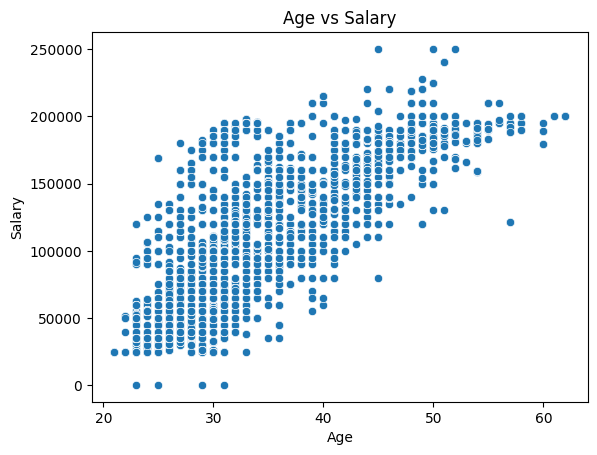

In [29]:
sns.scatterplot(x='Age',y='Salary',data=df)
plt.title('Age vs Salary')
plt.show()

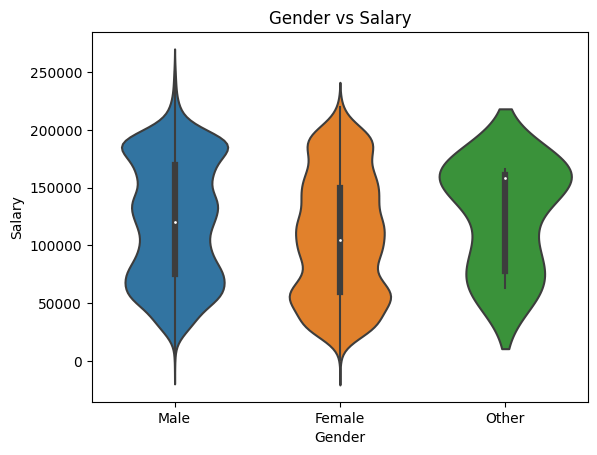

In [30]:
sns.violinplot(x= 'Gender', y = 'Salary', data = df)
plt.title('Gender vs Salary')
plt.show()

In [31]:
from sklearn.preprocessing import LabelEncoder
features = ['Gender','Country','Education Level','Job Title','Race']
le = LabelEncoder()
for feature in features:
    le.fit(df[feature].unique())
    df[feature] = le.transform(df[feature])
    print(feature, df[feature].unique())

Gender [1 0 2]
Country [3 4 1 2 0]
Education Level [0 2 3 1]
Job Title [9 1 5 6 0 8 4 2 3 7]
Race [9 5 1 6 4 2 8 0 7 3]


In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[['Age', 'Years of Experience', 'Salary']]=scaler.fit_transform(df[['Age', 'Years of Experience', 'Salary']])

In [33]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,-0.213129,1,0,9,-0.510769,-0.479849,3,9
1,-0.738393,0,2,1,-0.840811,-0.953461,4,5
2,1.493980,1,3,5,1.139440,0.656819,1,9
3,0.312135,0,0,1,-0.180727,-1.048183,4,5
4,2.413192,1,2,5,1.964544,1.604042,4,1


<Axes: >

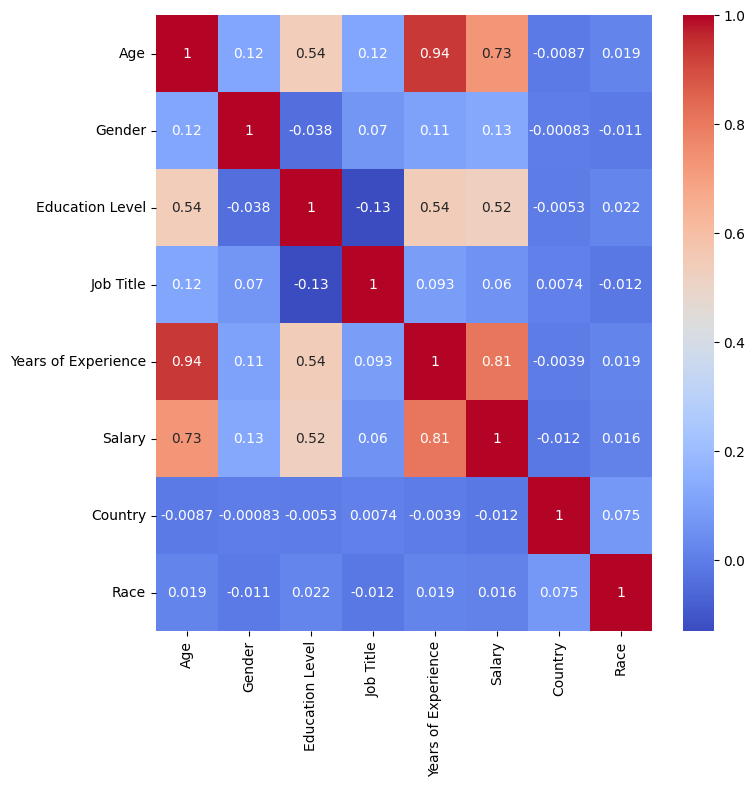

In [34]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot = True, cmap ='coolwarm')

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(df.drop('Salary', axis=1), df['Salary'], test_size=0.2, random_state=42)

In [36]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
rfg = RandomForestRegressor()

In [40]:
rfg.fit(x_train, y_train)

RandomForestRegressor()

In [41]:
rfg.score(x_test, y_test)

0.9433402039068425

In [42]:
x_test

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race
1883,0.312135,1,2,9,0.149315,2,9
2630,-0.869709,0,2,9,-0.675790,0,9
498,-1.132341,0,2,1,-1.170853,2,6
5973,-0.738393,0,0,1,-0.840811,0,2
4108,-0.607077,1,0,9,-0.510769,0,1
...,...,...,...,...,...,...,...
2830,-1.001025,0,2,9,-0.840811,1,9
6154,-0.738393,0,0,1,-0.840811,3,9
4940,-0.738393,0,3,5,-0.345748,0,2
135,0.706084,0,0,8,0.314335,1,3


In [43]:
r_pred = rfg.predict(x_test)

In [44]:
dfr = pd.DataFrame({'Actual': y_test, 'Predicted': r_pred})
dfr.reset_index(drop=True, inplace = True)
dfr.head(10)

,Actual,Predicted
0,0.656819,0.650998
1,-0.745659,-0.715633
2,-0.290405,-0.290405
3,-1.048183,-1.049604
4,-0.669294,-0.653586
5,1.414598,1.502926
6,-0.820850,-0.812514
7,-1.142906,-1.110523
8,1.509320,1.538286
9,0.277930,0.313550


C:\Users\khush\AppData\Local\Temp\ipykernel_15004\174021283.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dfr['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual')
C:\Users\khush\AppData\Local\Temp\ipykernel_15004\174021283.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwa

<Axes: xlabel='Predicted', ylabel='Density'>

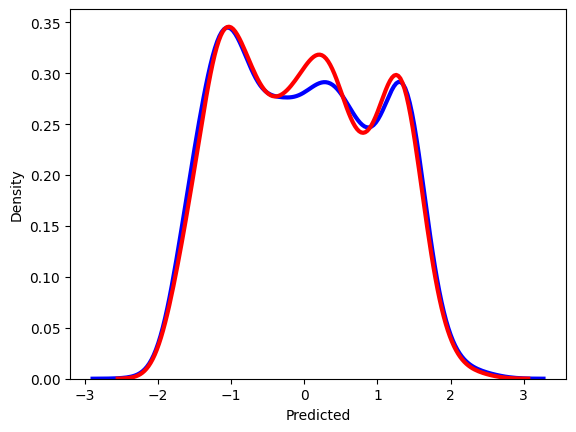

In [45]:
ax = sns.distplot(dfr['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual')
sns.distplot(  dfr['Predicted'], color = 'red', ax=ax, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Predicted')

In [47]:
print("R2 Score:",rfg.score(x_test, y_test))
print("Mean Squared Error:",mean_squared_error(y_test, r_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, r_pred)))

R2 Score: 0.9433402039068425
Mean Squared Error: 0.0579838583638488
Root Mean Squared Error: 0.2407983769958776
